In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

오늘 어떤 채소를 사는게 이득이냐?
채소를 선택하면 -> 언제 사는게 좋은가? (일주일 안에)

분석시 날씨도 함께 생각


In [6]:
d = pd.read_csv('data/auction_202401.csv', encoding='cp949')
d.head(5)

,품목명,단위,등급,가격,산지,친환경구분,입력일
0,[가리비국산]가리비국산,5kg,보통(3등),24000,경상남도 남해군,일반,20240103
1,[가리비국산]가리비국산,5kg,보통(3등),24000,경상남도 남해군,일반,20240103
2,[가리비국산]가리비국산,5kg,보통(3등),24000,경상남도 남해군,일반,20240103
3,[가리비국산]가리비국산,5kg,보통(3등),23000,경상남도 통영시,일반,20240103
4,[가리비국산]가리비국산,5kg,보통(3등),24000,경상남도 통영시,일반,20240103


In [8]:
d.입력일.unique()

array([20240103, 20240104, 20240105, 20240106, 20240108, 20240109,
       20240110, 20240111, 20240112, 20240113, 20240115, 20240116,
       20240117, 20240118, 20240119, 20240120, 20240122, 20240123,
       20240124, 20240125, 20240126, 20240127, 20240129, 20240130,
       20240131])

In [6]:
data = pd.read_csv('한국농수산식품유통공사_친환경농산물 소매가격정보_20221231.csv', encoding='cp949')
data.head()

,가격등록일자,품목명,품종명,평균가격,등급명,유통단계별무게,유통단계별단위명
0,2005-01-06,쌀,일반계,43330,유기농,10,kg
1,2005-01-06,쌀,일반계,45000,유기농,10,kg
2,2005-01-06,쌀,일반계,34800,무농약,10,kg
3,2005-01-06,쌀,일반계,34800,무농약,10,kg
4,2005-01-06,쌀,일반계,38000,무농약,10,kg


In [14]:
data.columns = ['date', 'product_', 'type', 'price', 'eco_type', 'unit', 'region']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263094 entries, 0 to 263093
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      263094 non-null  object
 1   product_  263094 non-null  object
 2   type      263094 non-null  object
 3   price     263094 non-null  int64 
 4   eco_type  263094 non-null  object
 5   unit      263094 non-null  int64 
 6   region    263094 non-null  object
dtypes: int64(2), object(5)
memory usage: 14.1+ MB


In [12]:
# 날짜 개수 확인
data.date.nunique()

705

In [17]:
# 품목 개수 확인
data.product_.nunique()

31


In [23]:
data_eco = data[data.eco_type == '유기농']
data_eco.head(6)

,date,product_,type,price,eco_type,unit,region
0,2005-01-06,쌀,일반계,43330,유기농,10,kg
1,2005-01-06,쌀,일반계,45000,유기농,10,kg
16,2005-01-06,양배추,양배추,4000,유기농,1,포기
17,2005-01-06,양배추,양배추,4200,유기농,1,포기
18,2005-01-06,양배추,양배추,3000,유기농,1,포기
19,2005-01-06,양배추,양배추,398,유기농,1,포기


In [41]:
print(data_eco.product_.nunique())
print(len(data_eco))
data_eco['product_'].value_counts()

31
81566


product_
풋고추      14035
상추       13173
깻잎        7327
쌀         4913
피망        4140
고구마       4097
파         3429
당근        3378
시금치       3152
방울토마토     2565
파프리카      2497
양배추       2459
토마토       2439
오이        2420
무         2359
양파        1896
감자        1588
호박        1412
딸기        1006
배          822
미나리        634
사과         518
계란         258
배추         225
참외         222
감귤         204
부추         133
팽이버섯       131
포도         105
가지          26
닭고기          3
Name: count, dtype: int64

In [64]:
data_eco_group = data_eco.groupby(['product_', 'date'])['price'].mean().unstack()
data_eco_group = data_eco_group.T
print(len(data_eco_group))
data_eco_group.head()

705


product_,가지,감귤,감자,계란,고구마,깻잎,닭고기,당근,딸기,무,...,오이,참외,토마토,파,파프리카,팽이버섯,포도,풋고추,피망,호박
date,,,,,,,,,,,,,,,,,,,,,
2005-01-06,NaN,2160.0,NaN,NaN,NaN,3492.5,NaN,4166.666667,1000.000000,NaN,...,8500.0,NaN,6000.0,5706.000000,NaN,NaN,NaN,1258.571429,NaN,NaN
2005-01-20,NaN,5320.0,NaN,NaN,NaN,3800.0,NaN,3500.000000,733.333333,NaN,...,NaN,NaN,5500.0,5698.333333,NaN,NaN,NaN,1181.250000,NaN,7330.0
2005-02-10,NaN,NaN,NaN,NaN,NaN,3017.5,NaN,4515.000000,1213.333333,NaN,...,8090.0,NaN,5000.0,4514.000000,NaN,NaN,NaN,1306.000000,NaN,NaN
2005-02-24,NaN,NaN,NaN,NaN,NaN,3090.0,NaN,4530.000000,1213.333333,NaN,...,8180.0,NaN,5500.0,4514.000000,NaN,NaN,NaN,1385.000000,NaN,NaN
2005-03-10,NaN,NaN,NaN,NaN,NaN,2987.5,NaN,4530.000000,910.000000,NaN,...,8180.0,NaN,6800.0,5040.000000,NaN,NaN,NaN,1448.250000,NaN,NaN


In [44]:
data_eco_group.columns.unique()

Index(['가지', '감귤', '감자', '계란', '고구마', '깻잎', '닭고기', '당근', '딸기', '무', '미나리',
       '방울토마토', '배', '배추', '부추', '사과', '상추', '시금치', '쌀', '양배추', '양파', '오이',
       '참외', '토마토', '파', '파프리카', '팽이버섯', '포도', '풋고추', '피망', '호박'],
      dtype='object', name='product_')

In [67]:
# 각각 결측값 확인, 결측값 비율 확인, 이때 전체 데이터는 705개임
data_null = data_eco_group.isnull().sum()
pd.DataFrame(data_null/len(data_eco_group)).sort_values(by=0, ascending=True)

,0
product_,
깻잎,0.001418
쌀,0.001418
상추,0.002837
풋고추,0.007092
고구마,0.112057
양배추,0.158865
시금치,0.167376
당근,0.175887
파,0.211348


## 데이터 변환

In [75]:
# 날짜를 datetime으로 변환
data_eco_group.index = pd.to_datetime(data_eco_group.index)

## 시각화
대강 많이 구매하고, 결측치도 많이 없는 쌀, 배추, 무, 대파, 양파에 대해서 시각화

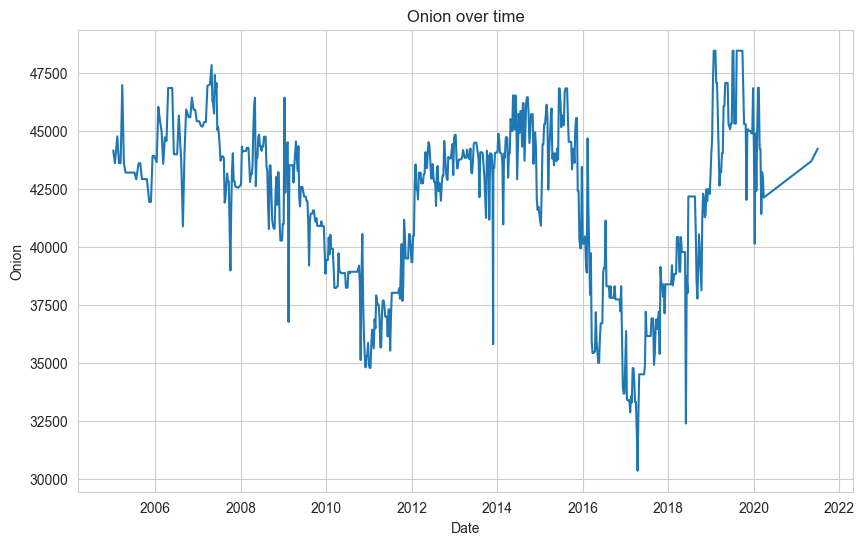

In [77]:
# 쌀에 대해서 시각화
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x=data_eco_group.index, y=data_eco_group['쌀'])
plt.xlabel('Date')
plt.ylabel('Onion')
plt.title('Onion over time')
plt.show()

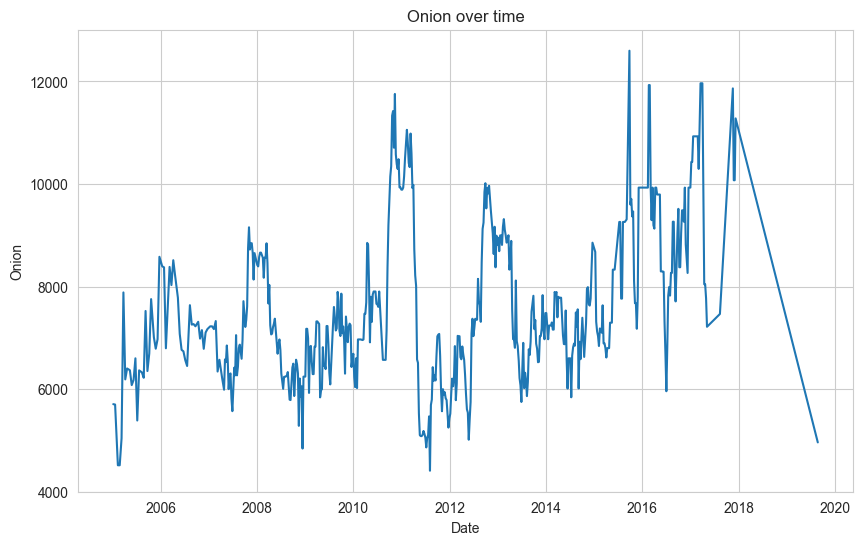

In [78]:
# 배추에 대해서 시각화

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x=data_eco_group.index, y=data_eco_group['파'])
plt.xlabel('Date')
plt.ylabel('Onion')
plt.title('Onion over time')
plt.show()

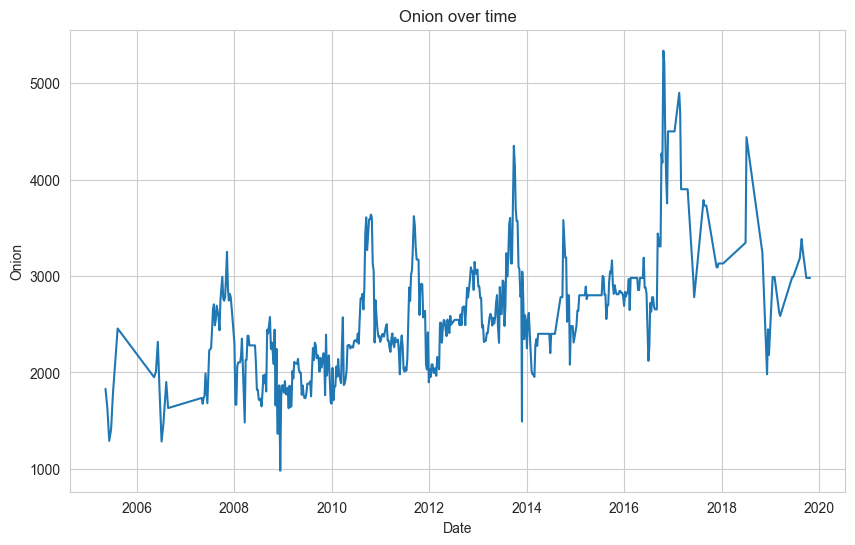

In [79]:
# 무에 대해서 시각화
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x=data_eco_group.index, y=data_eco_group['무'])
plt.xlabel('Date')
plt.ylabel('Onion')
plt.title('Onion over time')
plt.show()

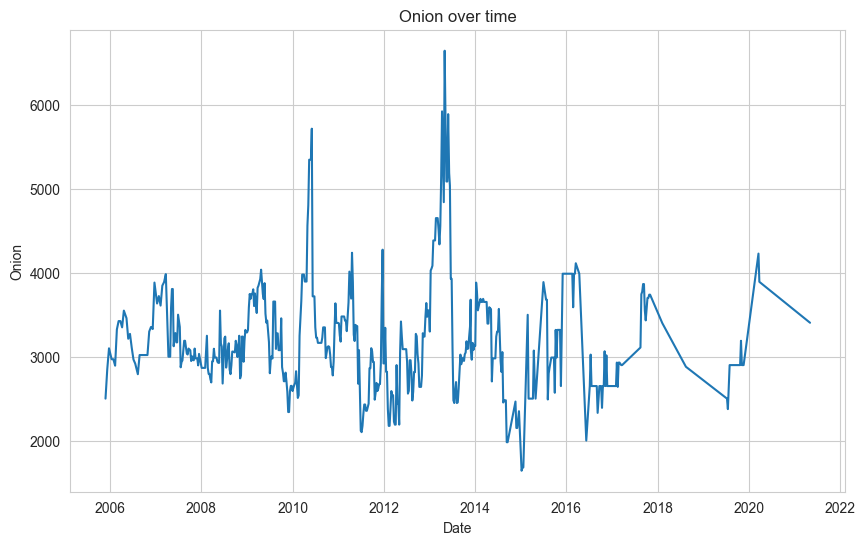

In [76]:
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x=data_eco_group.index, y=data_eco_group['양파'])
plt.xlabel('Date')
plt.ylabel('Onion')
plt.title('Onion over time')
plt.show()

## 데이터 분석

### data split

In [92]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [94]:
print(data_eco_group.shape[0])
print(data_eco_group.shape[1])
print(data_eco_group.shape)

705
31
(705, 31)


In [95]:
data_eco_group_train, data_eco_group_test = train_test_split(data_eco_group, test_size=0.2, random_state=42)
print(data_eco_group_train.shape)
print(data_eco_group_test.shape)

(564, 31)
(141, 31)


### build model

In [93]:
model = tf.keras.Sequential([
    layers.LSTM(128, input_shape=(data_eco_group.shape[0], data_eco_group.shape[1])),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(128)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='relu')
])

ValueError: Input 0 of layer "bidirectional_1" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)